#
# EDA-Heatmap and Density Plot:
#

###
## Importing Essential Stuff
###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

###
## Previous Codes
###

In [2]:
titanic = sns.load_dataset('titanic')
titanic.describe()
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.isnull().sum()['age']/titanic.shape[0] 
# the output 0.19865319865319866 means that around 20% of age values are null values

0.19865319865319866

In [6]:
titanic.isnull().sum()['deck']/titanic.shape[0] 

0.7721661054994389

###
## Heatmap:
###

<Axes: >

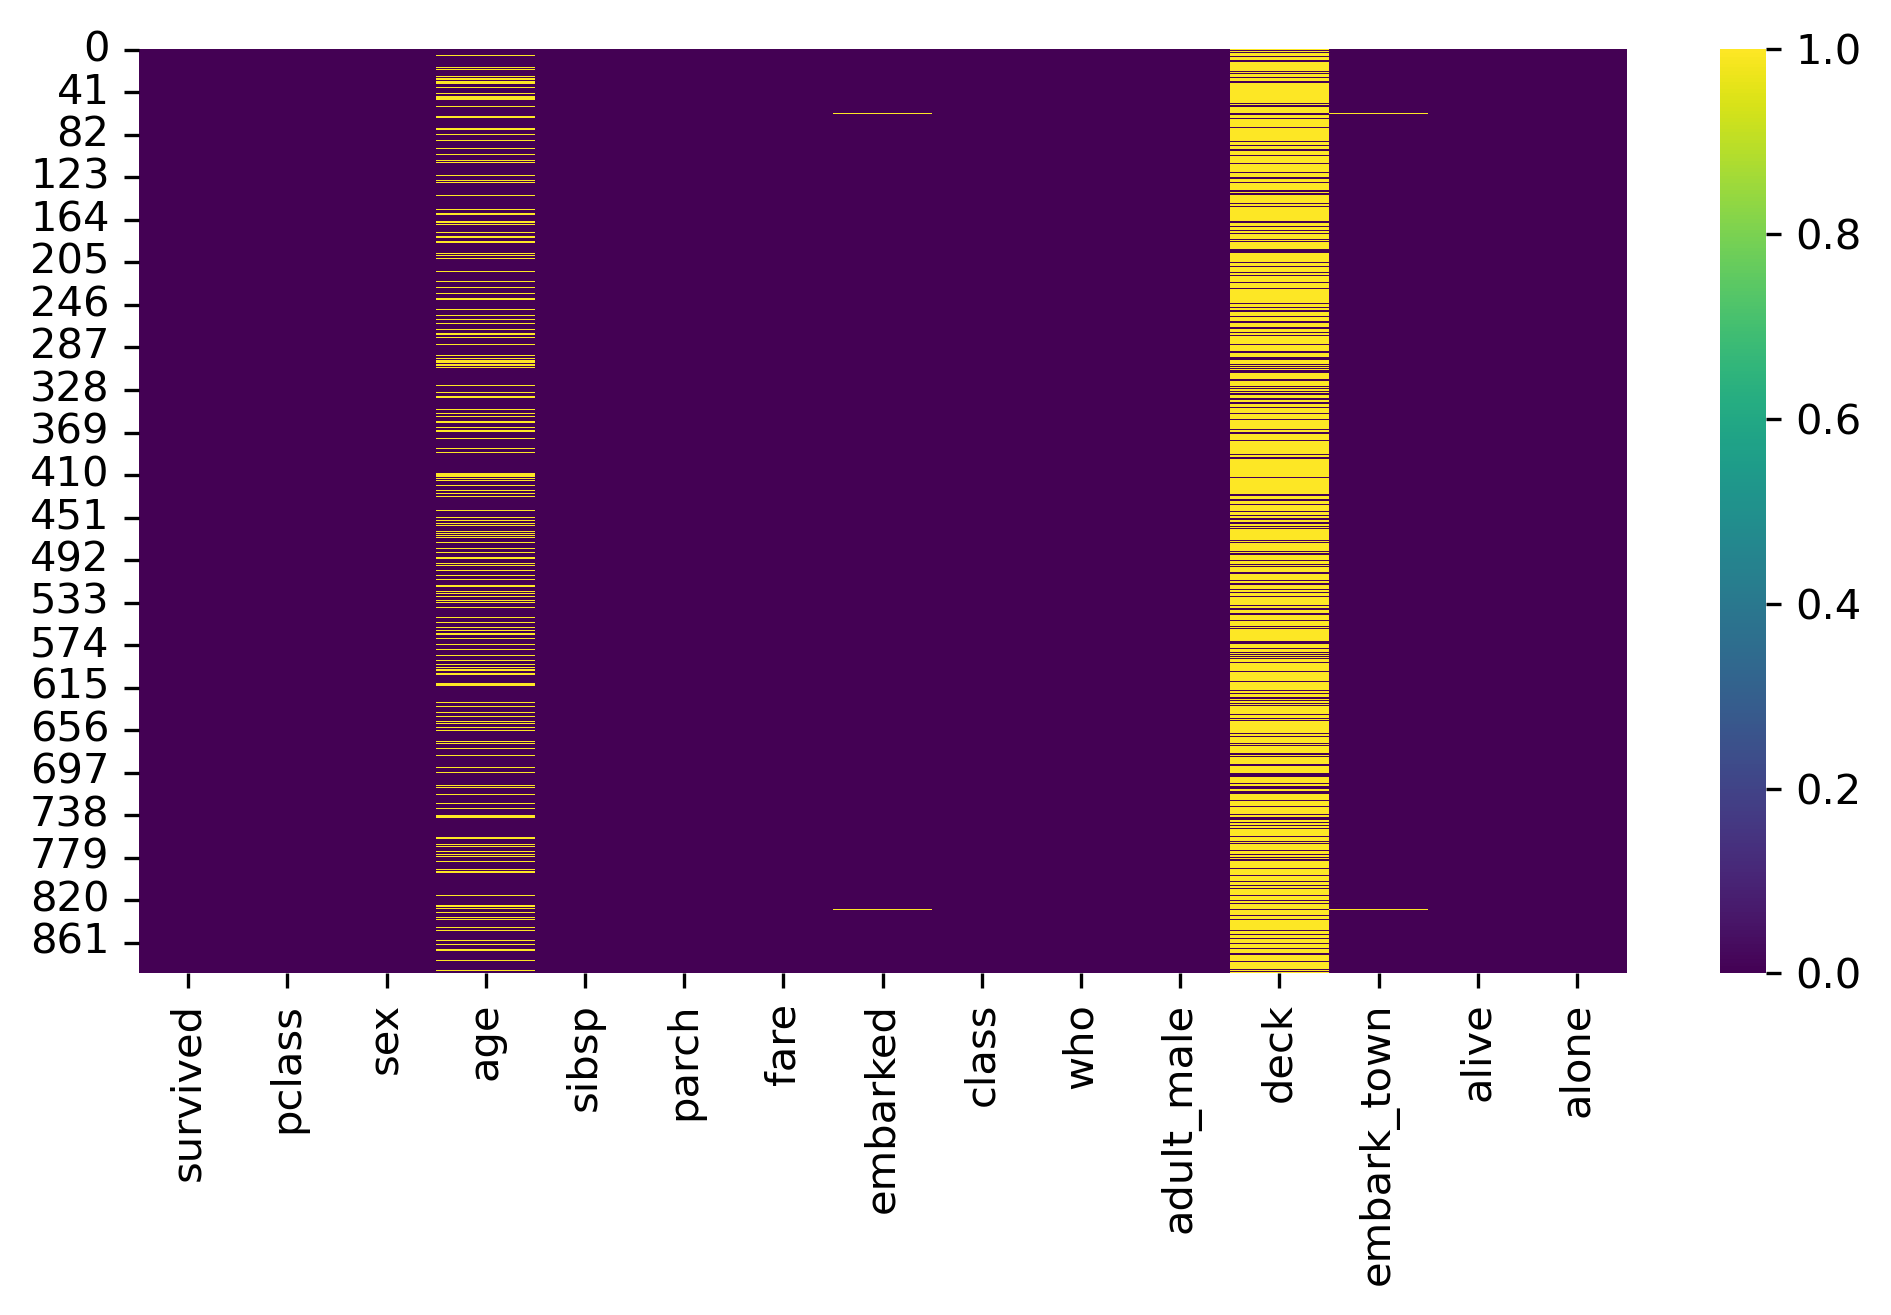

In [26]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 300
sns.heatmap(titanic.isnull(), cmap = 'viridis')

###
## Histogram Plot:
###

Text(0.5, 1.0, 'Age Distribution of Titanic Passengers\n')

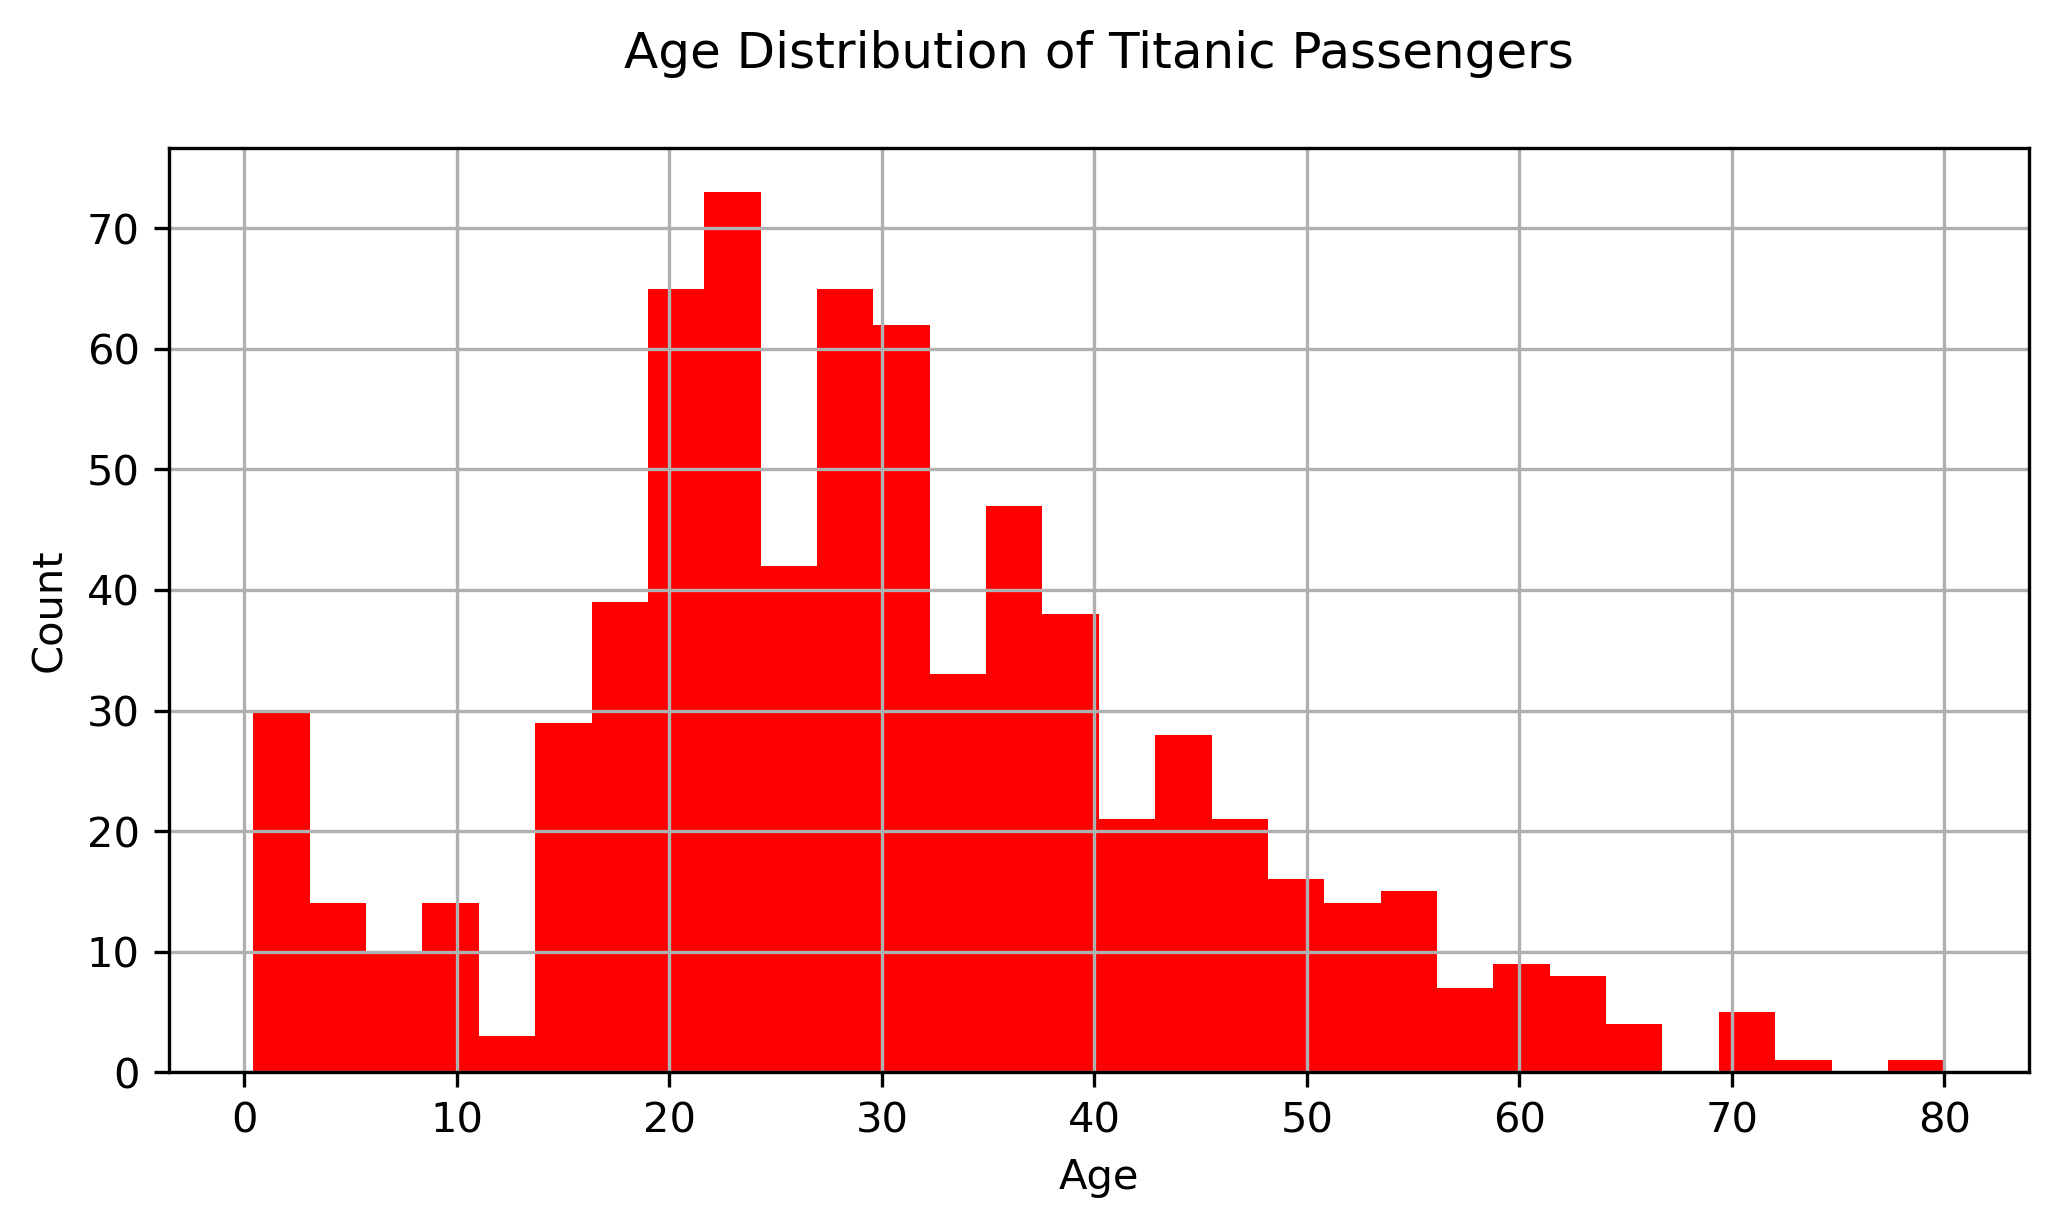

In [66]:
titanic['age'].hist(bins = 30, color = 'red', alpha = 1)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Titanic Passengers\n')

In [8]:
print(titanic['age'].isnull().sum())
titanic[titanic['age'] == 20]

177


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
91,0,3,male,20.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
113,0,3,female,20.0,1,0,9.8250,S,Third,woman,False,NaN,Southampton,no,False
131,0,3,male,20.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
378,0,3,male,20.0,0,0,4.0125,C,Third,man,True,NaN,Cherbourg,no,True
404,0,3,female,20.0,0,0,8.6625,S,Third,woman,False,NaN,Southampton,no,True
441,0,3,male,20.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
622,1,3,male,20.0,1,1,15.7417,C,Third,man,True,NaN,Cherbourg,yes,False
640,0,3,male,20.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
664,1,3,male,20.0,1,0,7.9250,S,Third,man,True,NaN,Southampton,yes,False


###
## Density & Histogram Plot:
###

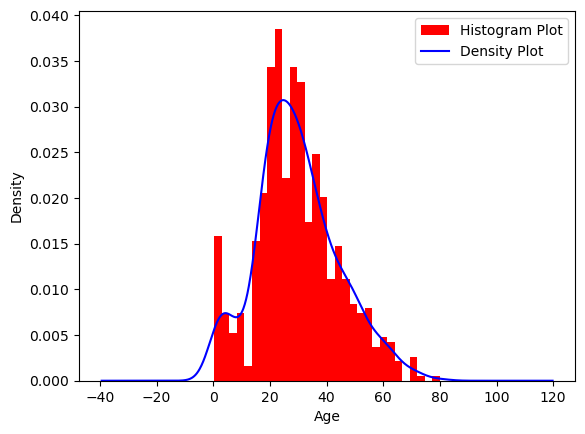

In [9]:
ax = titanic['age'].hist(bins = 30, color = 'red', alpha = 1, density = True, label = 'Histogram Plot')
titanic['age'].plot(kind = 'density', color = 'blue', alpha = 1, label = 'Density Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Density')
plt.legend()